# Chapter 2

# House Pricing problem


## 1. Data downloading
<ul><li>Taking data from handson-ml github site via fetching and loading code</li>
    <li>Then loading data into dataframe</li></ul>


In [4]:
import os 
import tarfile
import urllib

download_root = '''https://raw.githubusercontent.com/ageron/handson-ml2/master/'''
housing_path = os.path.join("datasets",'housing') #directory path 'datasets/housing'
housing_url = download_root + "datasets/housing/housing.tgz" #download url

#Download data, create directory then extract data into directory
def fetch(url, path):
    os.makedirs(path, exist_ok = True)#make directory
    tgz_path = os.path.join(path, "housing.tgz")#tgz file location
    urllib.request.urlretrieve(url, tgz_path)#request file and save to location
    housing_tgz = tarfile.open(tgz_path)#open tgz file
    housing_tgz.extractall(path=path)#extract file and save to location
    housing_tgz.close()

fetch(housing_url, housing_path)

In [5]:
#load ding code into pandas dataframe
import pandas as pd

def load(path):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)

df = load(housing_path)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## 2. Gain insight through data

In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
category = df['ocean_proximity'].value_counts().reset_index()
category #cheking type of house in ocean_proximity

ocean_proximity  count
0       <1H OCEAN   9136
1          INLAND   6551
2      NEAR OCEAN   2658
3        NEAR BAY   2290
4          ISLAND      5

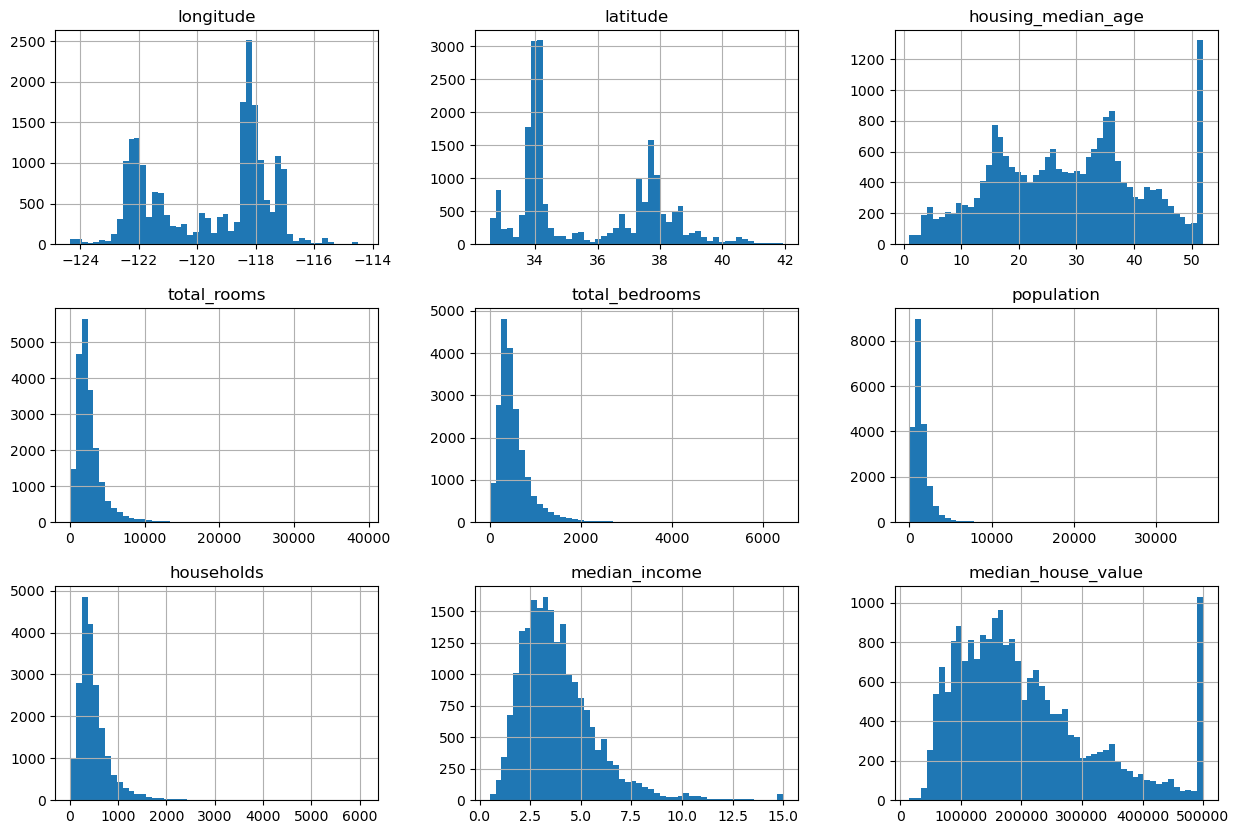

In [9]:
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (15,10))
plt.show()#plot data to have overall view

## 3. Separating Data
* Making train_set and test_set

In [11]:
import numpy as np

def split(data, test_ratio, random_seed = 69):
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    #retrieve shuffled indices for each set
    test_set = data.iloc[test_indices]
    train_set = data.iloc[train_indices]
    #create train and test set follow given ratio
    return train_set, test_set

train_set, test_set = split(df, 0.3)

print(len(train_set), len(test_set))

14448 6192


* Try to keep train_set and test_set unchange even data have been updated
* It is crucial that data in the test set dont go into the train set

In [13]:
from zlib import crc32

def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) < test_ratio * 2 **  32 
    """turn id to hash key 
    then compare to get right ratio of data because max of crc 32 is 2**32"""

def split_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    is_in_test = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    #retrieve [true, false] list base on hash key via id
    test_set = data[is_in_test]
    train_set = data[~is_in_test]

    return train_set, test_set

housing = df.reset_index()#using indecies as identifiers since data dont have them
train_set, test_set = split_by_id(housing, 0.3, 'index')

print(len(train_set), len(test_set))
#or we can use
#from sklearn.model_selection import train_test_split

14449 6191


* Split data and keep some feature's distribution simultaneously (stradified sampling)
* Try with median_income

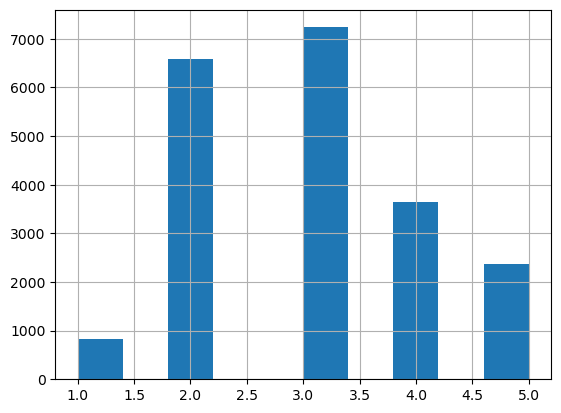

In [15]:
housing['income_category'] = pd.cut(housing['median_income'],
                                    bins = [0., 1.5, 3., 4.5, 6., np.inf],
                                   labels = [1, 2, 3, 4, 5])
housing['income_category'].hist()
plt.show()

In [16]:
housing['income_category']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_category, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split_module= StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
#setting hyper parameter for split class
for train_index, test_index in split_module.split(housing, housing['income_category']):
    #split of strat class return array or list of array contain indices
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

print(len(strat_train), len(strat_test))
strat_train

14448 6192


index  longitude  latitude  housing_median_age  total_rooms  \
8577    8577    -118.41     33.89                31.0       1428.0   
5960    5960    -117.83     34.11                29.0       2671.0   
4753    4753    -118.33     34.04                31.0       1090.0   
15423  15423    -117.26     33.20                13.0       3163.0   
9788    9788    -120.51     35.91                39.0        768.0   
...      ...        ...       ...                 ...          ...   
13602  13602    -117.25     34.15                30.0       1770.0   
14693  14693    -117.11     32.79                16.0       1791.0   
15591  15591    -116.34     33.36                24.0       2746.0   
5676    5676    -118.29     33.71                36.0       3135.0   
7730    7730    -118.13     33.92                36.0        984.0   

       total_bedrooms  population  households  median_income  \
8577            320.0       677.0       331.0         7.2316   
5960            437.0      1484.0       445.0         4.9844   
4753            251.0       955.0       239.0         2.9130   
15423           725.0      1675.0       629.0         2.8214   
9788            162.0       264.0       118.0         5.3245   
...               ...         ...         ...            ...   
13602           380.0       990.0       348.0         3.3000   
14693           518.0      1006.0       491.0         3.5179   
15591           514.0       731.0       295.0         3.3214   
5676            746.0      1815.0       697.0         3.7596   
7730            183.0       615.0       206.0         4.1786   

       median_house_value ocean_proximity income_category  
8577             500001.0       <1H OCEAN               5  
5960             203000.0          INLAND               4  
4753             192500.0       <1H OCEAN               2  
15423            121900.0       <1H OCEAN               2  
9788             250000.0          INLAND               4  
...                   ...             ...             ...  
13602             97600.0          INLAND               3  
14693            129300.0      NEAR OCEAN               3  
15591            176400.0          INLAND               3  
5676             300000.0      NEAR OCEAN               3  
7730             201500.0       <1H OCEAN               3  

[14448 rows x 12 columns]

In [18]:
for set in (strat_train, strat_test):
    set.drop('income_category', axis = 1, inplace = True)
    #drop labels from data
    
strat_train

index  longitude  latitude  housing_median_age  total_rooms  \
8577    8577    -118.41     33.89                31.0       1428.0   
5960    5960    -117.83     34.11                29.0       2671.0   
4753    4753    -118.33     34.04                31.0       1090.0   
15423  15423    -117.26     33.20                13.0       3163.0   
9788    9788    -120.51     35.91                39.0        768.0   
...      ...        ...       ...                 ...          ...   
13602  13602    -117.25     34.15                30.0       1770.0   
14693  14693    -117.11     32.79                16.0       1791.0   
15591  15591    -116.34     33.36                24.0       2746.0   
5676    5676    -118.29     33.71                36.0       3135.0   
7730    7730    -118.13     33.92                36.0        984.0   

       total_bedrooms  population  households  median_income  \
8577            320.0       677.0       331.0         7.2316   
5960            437.0      1484.0       445.0         4.9844   
4753            251.0       955.0       239.0         2.9130   
15423           725.0      1675.0       629.0         2.8214   
9788            162.0       264.0       118.0         5.3245   
...               ...         ...         ...            ...   
13602           380.0       990.0       348.0         3.3000   
14693           518.0      1006.0       491.0         3.5179   
15591           514.0       731.0       295.0         3.3214   
5676            746.0      1815.0       697.0         3.7596   
7730            183.0       615.0       206.0         4.1786   

       median_house_value ocean_proximity  
8577             500001.0       <1H OCEAN  
5960             203000.0          INLAND  
4753             192500.0       <1H OCEAN  
15423            121900.0       <1H OCEAN  
9788             250000.0          INLAND  
...                   ...             ...  
13602             97600.0          INLAND  
14693            129300.0      NEAR OCEAN  
15591            176400.0          INLAND  
5676             300000.0      NEAR OCEAN  
7730             201500.0       <1H OCEAN  

[14448 rows x 11 columns]

## 4. Discover and Visualize Data
* Visualizing Geographical Data

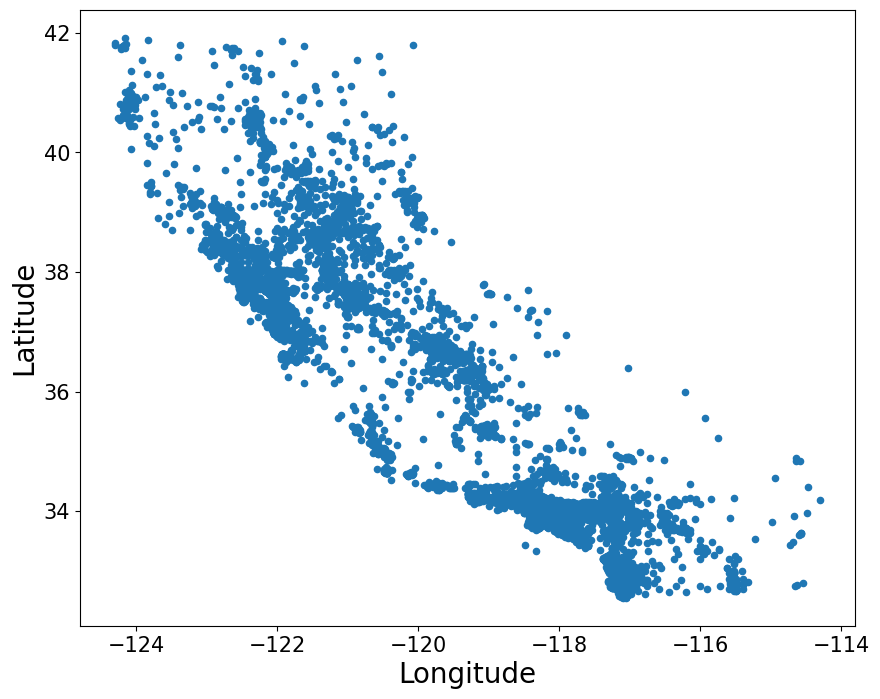

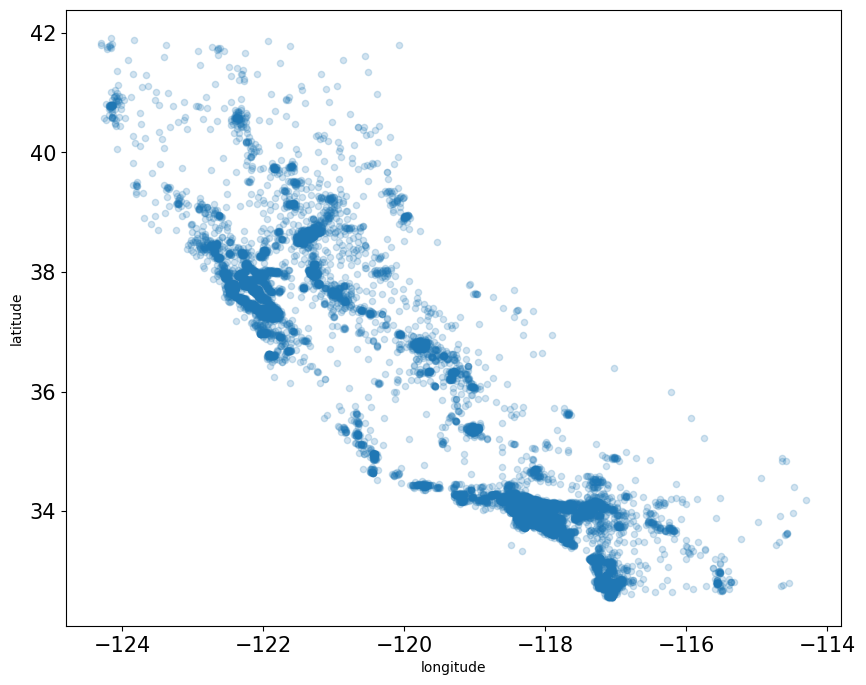

In [20]:
plot_data = strat_train.copy()#keep original data remain untouch

plot_data.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
               figsize=(10,8), fontsize = 15)
plt.ylabel("Latitude", fontsize = 20)
plt.xlabel("Longitude", fontsize = 20)
plot_data.plot(kind = 'scatter', x = 'longitude', y = 'latitude'
              , alpha = 0.2#for transparency
                ,figsize=(10,8), fontsize = 15)
plt.show()

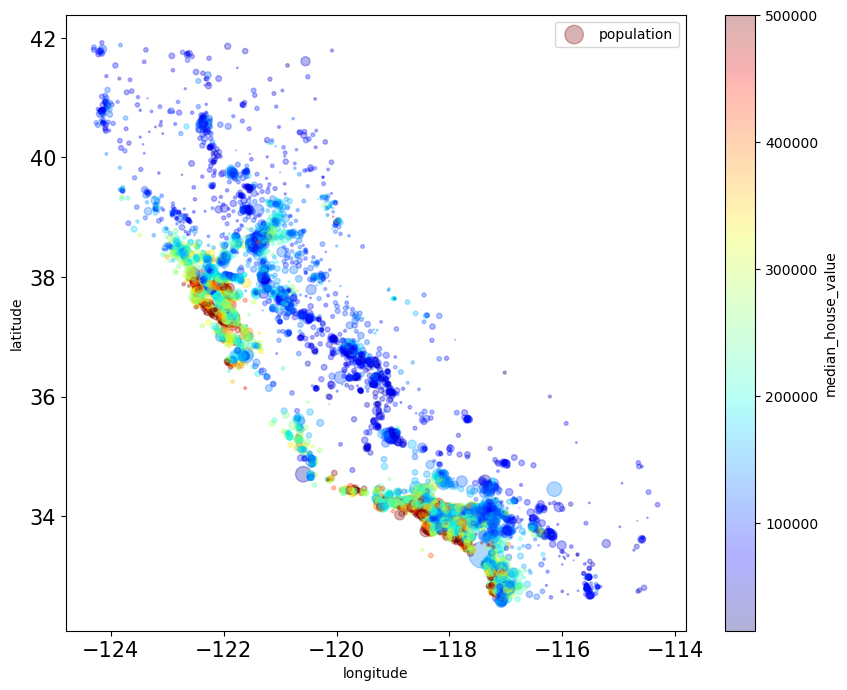

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

plot_data.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
               fontsize = 15,
               s=plot_data['population']/100#size of each dot
              , label = 'population',
               c= 'median_house_value'#colored by attribute
                ,cmap=plt.get_cmap('jet'), alpha = 0.3, ax=ax)
# plt.ylabel("Latitude", fontsize = 20)
# plt.xlabel("Longitude", fontsize = 20)
plt.show()

* Discover correlation

In [23]:
Corr = plot_data.drop(['ocean_proximity','index'], axis = 1).corr()
Corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924673           -0.113569     0.052591   
latitude            -0.924673  1.000000            0.012366    -0.043967   
housing_median_age  -0.113569  0.012366            1.000000    -0.362810   
total_rooms          0.052591 -0.043967           -0.362810     1.000000   
total_bedrooms       0.080166 -0.077201           -0.322190     0.929288   
population           0.109755 -0.118356           -0.296377     0.853244   
households           0.065387 -0.081548           -0.302394     0.917442   
median_income       -0.022082 -0.073493           -0.112490     0.200391   
median_house_value  -0.052345 -0.137864            0.116305     0.136801   

                    total_bedrooms  population  households  median_income  \
longitude                 0.080166    0.109755    0.065387      -0.022082   
latitude                 -0.077201   -0.118356   -0.081548      -0.073493   
housing_median_age       -0.322190   -0.296377   -0.302394      -0.112490   
total_rooms               0.929288    0.853244    0.917442       0.200391   
total_bedrooms            1.000000    0.873909    0.979684      -0.009279   
population                0.873909    1.000000    0.902632       0.002690   
households                0.979684    0.902632    1.000000       0.011088   
median_income            -0.009279    0.002690    0.011088       1.000000   
median_house_value        0.049523   -0.024592    0.066788       0.687873   

                    median_house_value  
longitude                    -0.052345  
latitude                     -0.137864  
housing_median_age            0.116305  
total_rooms                   0.136801  
total_bedrooms                0.049523  
population                   -0.024592  
households                    0.066788  
median_income                 0.687873  
median_house_value            1.000000

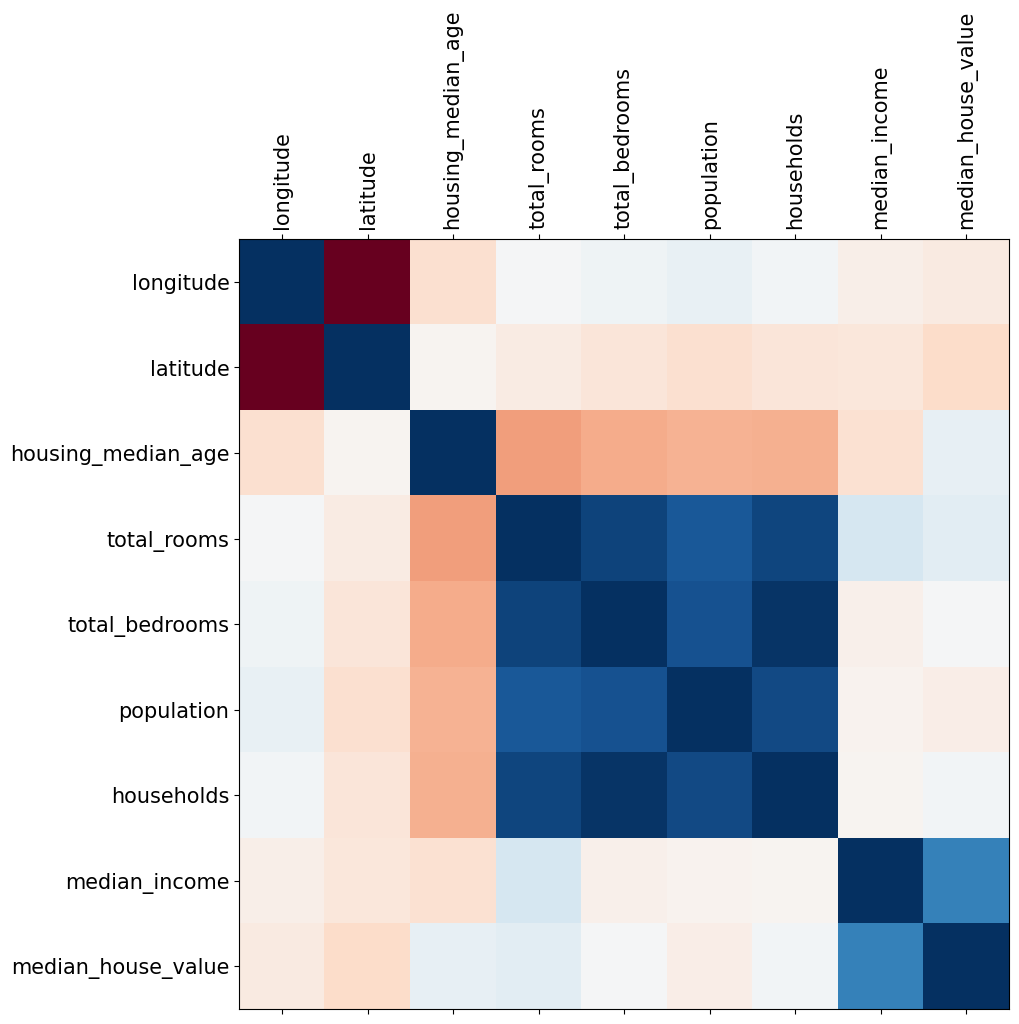

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

In [24]:
fig, ax = plt.subplots(figsize = (10,10))

ax.matshow(Corr, cmap='RdBu')
plt.yticks(range(len(Corr.columns)), Corr.columns, fontsize = 15)
plt.xticks(range(len(Corr.columns)), Corr.columns,rotation = 90,
          fontsize = 15)

plt.show()
Corr['median_house_value'].sort_values(ascending = False)

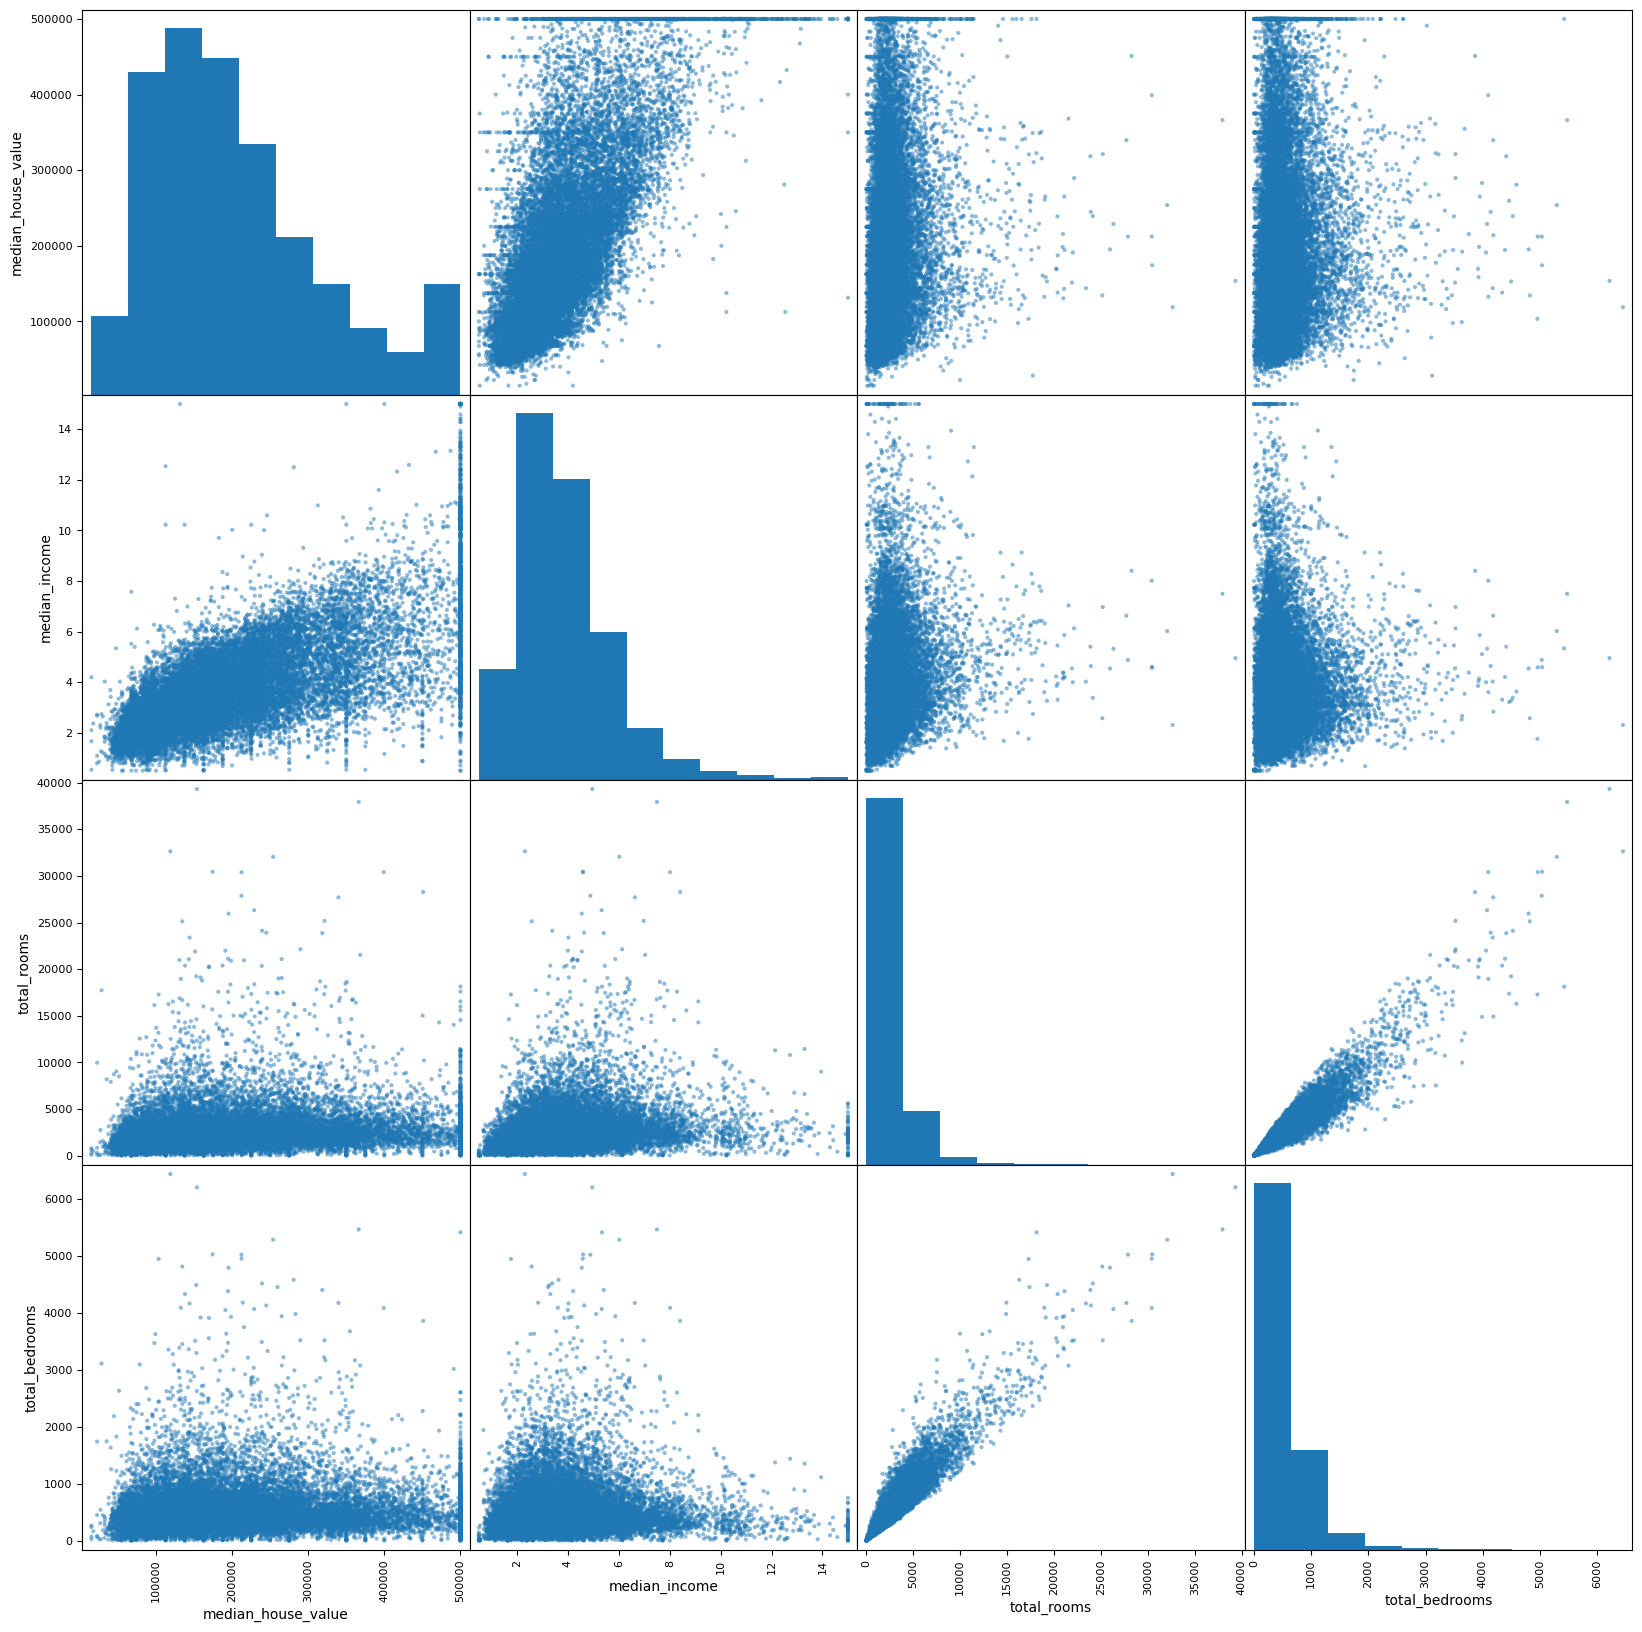

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income',
              'total_rooms','total_bedrooms']
scatter_matrix(housing[attributes], figsize=(20,20))
plt.ylabel(ylabel=['median_house_value', 'median_income',
              'total_rooms','total_bedrooms'],rotation=90)
plt.show()

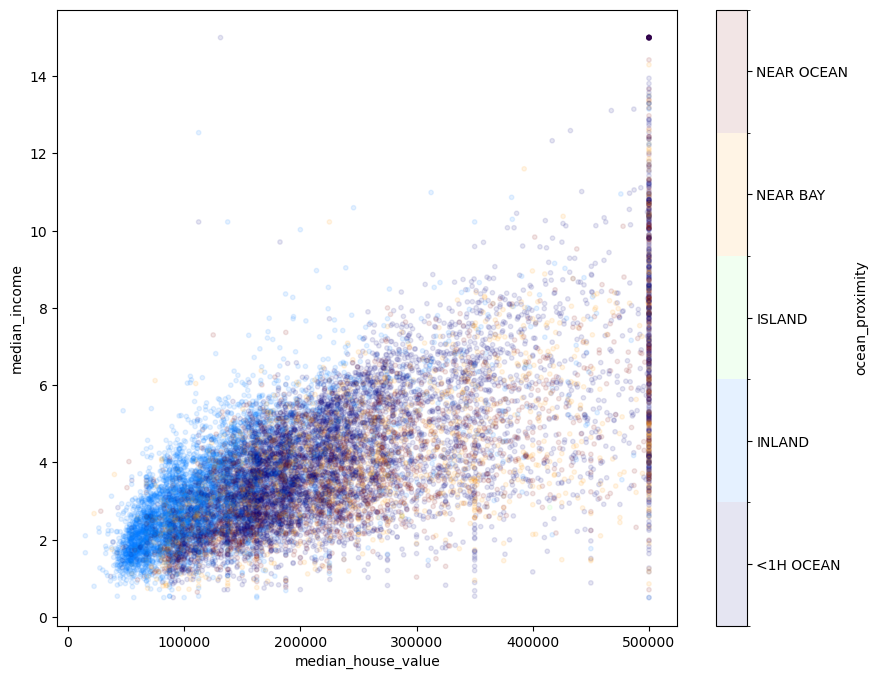

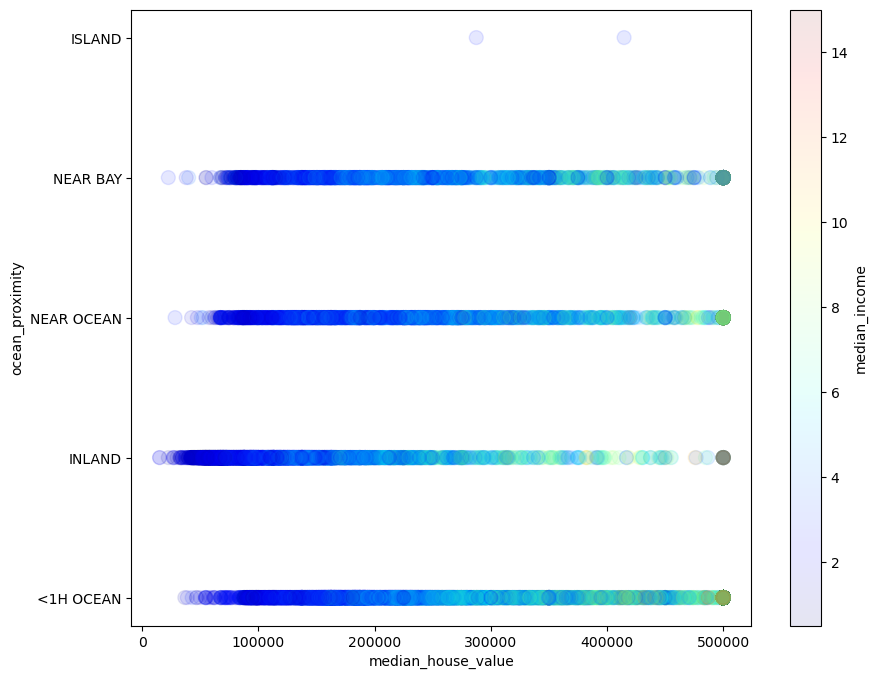

In [26]:
near_ocean=plot_data.copy()
near_ocean['ocean_proximity'] = pd.Categorical(near_ocean['ocean_proximity'])
near_ocean.plot(kind= 'scatter', x='median_house_value', 
               y='median_income', alpha=0.1, figsize=(10,8),
              c='ocean_proximity', s=10,cmap=plt.get_cmap('jet'))

near_ocean.plot(kind= 'scatter', x='median_house_value', 
               y='ocean_proximity', alpha=0.1, figsize=(10,8),
              c='median_income', s=100,cmap=plt.get_cmap('jet'))
plt.show()

* Try to gain insight by add more feature
* * rooms per household or rph
  * bedrooms per household or bph
  * population per household or pph
  * bedrooms per room or bpr

In [28]:
plot_data['rooms_per_house'] = plot_data['total_rooms']/plot_data['households']
plot_data['bedrooms_per_house'] = plot_data['total_bedrooms']/plot_data['households']
plot_data['populations_per_house'] = plot_data['population']/plot_data['households']
plot_data['bedrooms_per_room'] = plot_data['total_bedrooms']/plot_data['total_rooms']


Corr = plot_data.drop('ocean_proximity', axis = 1).corr()
Corr['median_house_value'].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.687873
rooms_per_house          0.144427
total_rooms              0.136801
housing_median_age       0.116305
index                    0.071273
households               0.066788
total_bedrooms           0.049523
populations_per_house   -0.024005
population              -0.024592
longitude               -0.052345
bedrooms_per_house      -0.054517
latitude                -0.137864
bedrooms_per_room       -0.262723
Name: median_house_value, dtype: float64

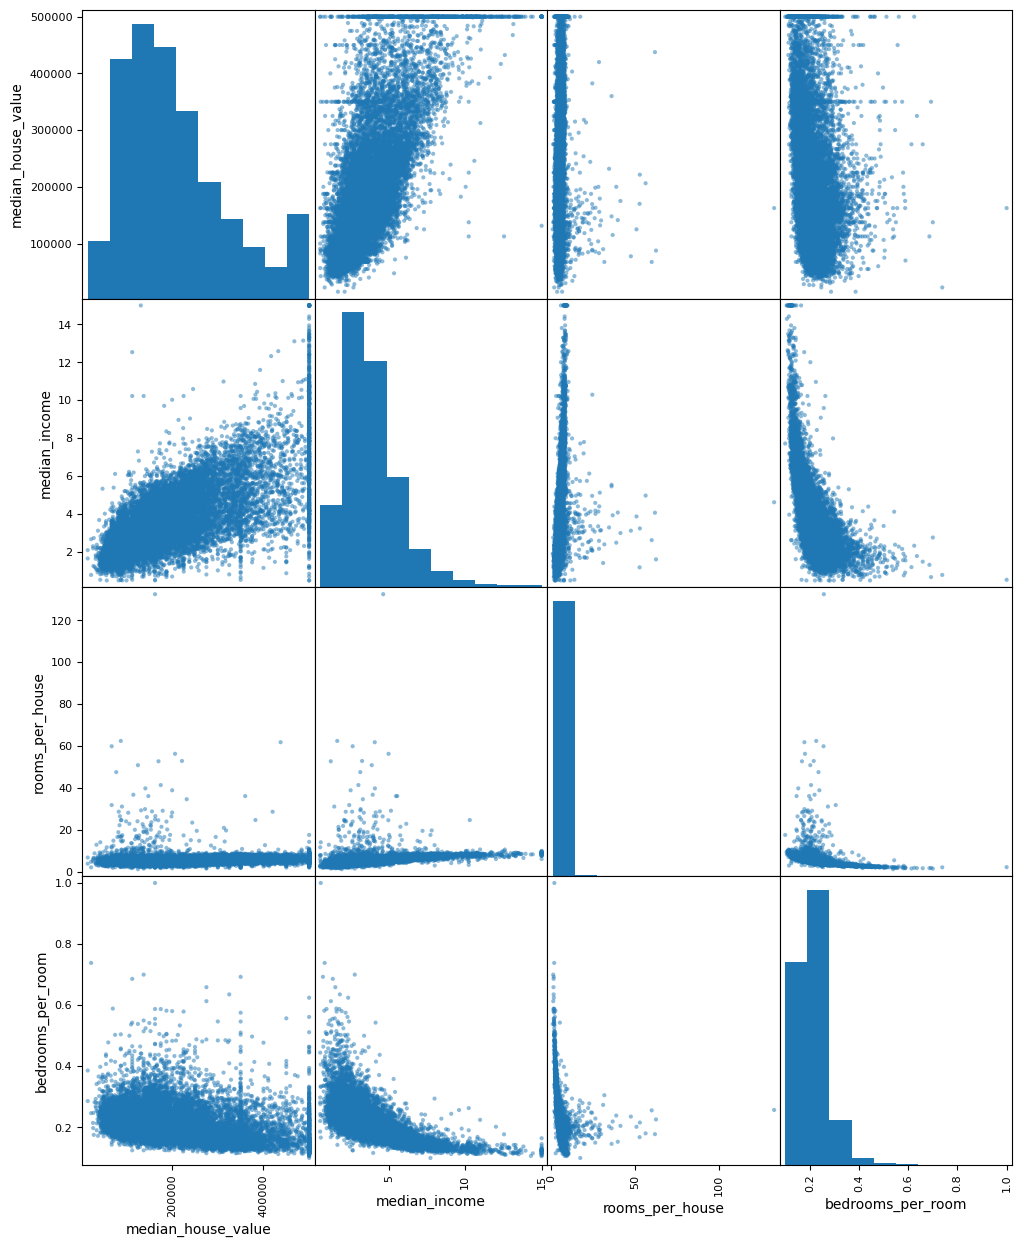

In [35]:
attribute = ['median_house_value', 'median_income', 'rooms_per_house', 'bedrooms_per_room']
scatter_matrix(plot_data[attribute], figsize=(12,15))

plt.show()

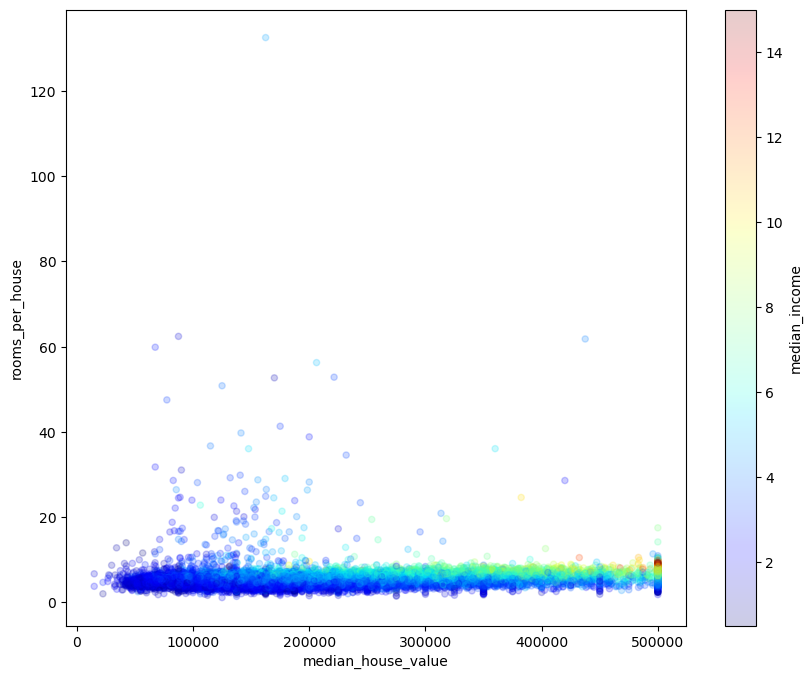

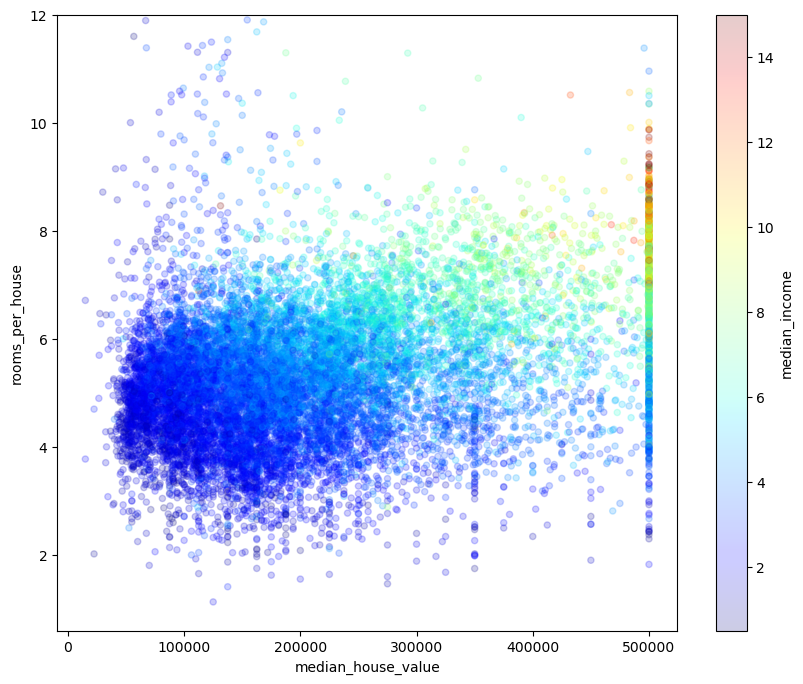

In [37]:
plot_data.plot(kind='scatter', x = 'median_house_value', y='rooms_per_house',
              alpha = 0.2, c='median_income', cmap='jet',figsize=(10,8))

plot_data.plot(kind='scatter', x = 'median_house_value', y='rooms_per_house',
              alpha = 0.2, c='median_income', cmap='jet',figsize=(10,8),
              ylim=(0.6,12))
plt.show()

> `People who have higher income tend to buy more expensive house and those house also tend to have more room`
> >House that have more than 15 rooms might be hotel or motel

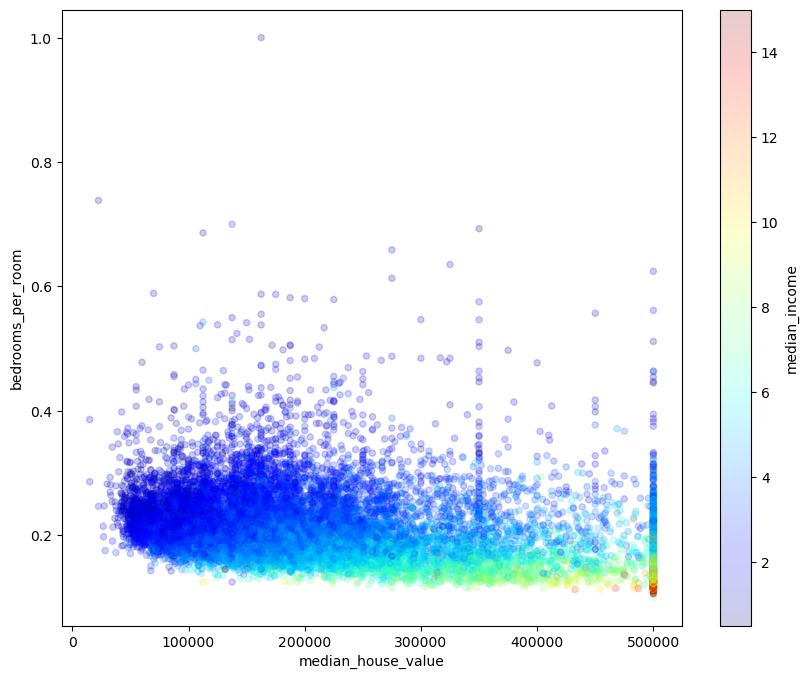

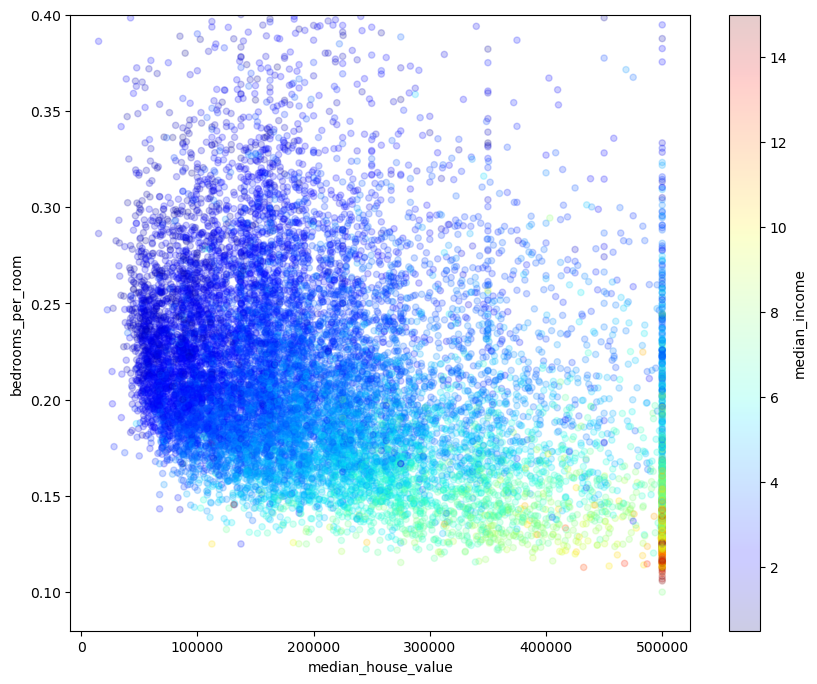

In [40]:
plot_data.plot(kind='scatter', x = 'median_house_value', y='bedrooms_per_room',
              alpha = 0.2, c='median_income', cmap='jet',figsize=(10,8))

plot_data.plot(kind='scatter', x = 'median_house_value', y='bedrooms_per_room',
              alpha = 0.2, c='median_income', cmap='jet',figsize=(10,8),
              ylim=(0.08,0.4))
plt.show()

> `Bedrooms per room seem to have opposite trend since wealthier people
> want to buy house that have smaller propotion of bedrooms over total rooms`
>> More expensive house also tend to have less bedrooms

## 5. Prepare data for Learning algorithm
* Separate Labels from training data

In [42]:
X_train = strat_train.drop('median_house_value', axis = 1)
Y_train = strat_train["median_house_value"].copy()

X_train.describe()

index     longitude      latitude  housing_median_age  \
count  14448.000000  14448.000000  14448.000000        14448.000000   
mean   10314.390504   -119.573294     35.633523           28.742594   
std     5976.502004      2.003203      2.132504           12.574925   
min        0.000000   -124.300000     32.550000            1.000000   
25%     5128.750000   -121.810000     33.940000           18.000000   
50%    10328.500000   -118.510000     34.260000           29.000000   
75%    15501.500000   -118.010000     37.720000           37.000000   
max    20638.000000   -114.310000     41.920000           52.000000   

        total_rooms  total_bedrooms    population    households  median_income  
count  14448.000000    14308.000000  14448.000000  14448.000000   14448.000000  
mean    2613.580565      533.261672   1413.560839    495.297204       3.873148  
std     2125.841046      412.858965   1114.876264    376.039520       1.893996  
min        6.000000        2.000000      3.000000      2.000000       0.499900  
25%     1438.000000      294.000000    780.000000    278.000000       2.564375  
50%     2111.000000      430.000000   1159.000000    406.000000       3.536000  
75%     3121.500000      641.000000   1708.000000    598.000000       4.742600  
max    37937.000000     5471.000000  35682.000000   5189.000000      15.000100

### Data cleaning:

> `Most Machine Learning Algorithm cannot work with missing features`
*    1. Get rid of the corresponding districts
*    2. Get rid of the whole attribute
*    3. Set the values to some values(Zero, the mean, the median, ect.)

In [45]:
# X_train.dropna(subset=['total_bedrooms']) #option 1

# X_train.drop('total_bedrooms', axis = 1, inplace = True) #option 2

median = X_train['total_bedrooms'].median() #option 3
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(median)

X_train

index  longitude  latitude  housing_median_age  total_rooms  \
8577    8577    -118.41     33.89                31.0       1428.0   
5960    5960    -117.83     34.11                29.0       2671.0   
4753    4753    -118.33     34.04                31.0       1090.0   
15423  15423    -117.26     33.20                13.0       3163.0   
9788    9788    -120.51     35.91                39.0        768.0   
...      ...        ...       ...                 ...          ...   
13602  13602    -117.25     34.15                30.0       1770.0   
14693  14693    -117.11     32.79                16.0       1791.0   
15591  15591    -116.34     33.36                24.0       2746.0   
5676    5676    -118.29     33.71                36.0       3135.0   
7730    7730    -118.13     33.92                36.0        984.0   

       total_bedrooms  population  households  median_income ocean_proximity  
8577            320.0       677.0       331.0         7.2316       <1H OCEAN  
5960            437.0      1484.0       445.0         4.9844          INLAND  
4753            251.0       955.0       239.0         2.9130       <1H OCEAN  
15423           725.0      1675.0       629.0         2.8214       <1H OCEAN  
9788            162.0       264.0       118.0         5.3245          INLAND  
...               ...         ...         ...            ...             ...  
13602           380.0       990.0       348.0         3.3000          INLAND  
14693           518.0      1006.0       491.0         3.5179      NEAR OCEAN  
15591           514.0       731.0       295.0         3.3214          INLAND  
5676            746.0      1815.0       697.0         3.7596      NEAR OCEAN  
7730            183.0       615.0       206.0         4.1786       <1H OCEAN  

[14448 rows x 10 columns]

In [47]:
X_train = strat_train.drop('median_house_value', axis = 1)
Y_train = strat_train["median_house_value"].copy()

# sklearn provide SimpleImputer serve simlilar function
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

temp = X_train.drop('ocean_proximity', axis = 1) #imputer can only handle number values
imputer.fit(temp) #imputer store median values at imputer.statistics_

transformed = imputer.transform(temp)

X = pd.DataFrame(transformed, columns = temp.columns, index = temp.index)
X['ocean_proximity'] = X_train['ocean_proximity']
X

index  longitude  latitude  housing_median_age  total_rooms  \
8577    8577.0    -118.41     33.89                31.0       1428.0   
5960    5960.0    -117.83     34.11                29.0       2671.0   
4753    4753.0    -118.33     34.04                31.0       1090.0   
15423  15423.0    -117.26     33.20                13.0       3163.0   
9788    9788.0    -120.51     35.91                39.0        768.0   
...        ...        ...       ...                 ...          ...   
13602  13602.0    -117.25     34.15                30.0       1770.0   
14693  14693.0    -117.11     32.79                16.0       1791.0   
15591  15591.0    -116.34     33.36                24.0       2746.0   
5676    5676.0    -118.29     33.71                36.0       3135.0   
7730    7730.0    -118.13     33.92                36.0        984.0   

       total_bedrooms  population  households  median_income ocean_proximity  
8577            320.0       677.0       331.0         7.2316       <1H OCEAN  
5960            437.0      1484.0       445.0         4.9844          INLAND  
4753            251.0       955.0       239.0         2.9130       <1H OCEAN  
15423           725.0      1675.0       629.0         2.8214       <1H OCEAN  
9788            162.0       264.0       118.0         5.3245          INLAND  
...               ...         ...         ...            ...             ...  
13602           380.0       990.0       348.0         3.3000          INLAND  
14693           518.0      1006.0       491.0         3.5179      NEAR OCEAN  
15591           514.0       731.0       295.0         3.3214          INLAND  
5676            746.0      1815.0       697.0         3.7596      NEAR OCEAN  
7730            183.0       615.0       206.0         4.1786       <1H OCEAN  

[14448 rows x 10 columns]

* Imputer can also fill with 'mean', 'most_frequent' or with a constant value
* sklearn.impute have more powerful imputers
    * KNNImputer using k-nearest neighbors's values
    * IterativeImputer train a regression model per feature to predict missing

### Handling Text and Categorical Attributes
>`Most Machine Leaning algorithms prefer to work with numbers`

* Use Scikit-Learn's OrdinalEncoder Class
* Get list of categories using 'categories_'

In [51]:
categories = X_train[['ocean_proximity']]
categories.head(10)

ocean_proximity
8577        <1H OCEAN
5960           INLAND
4753        <1H OCEAN
15423       <1H OCEAN
9788           INLAND
16873      NEAR OCEAN
8106       NEAR OCEAN
14913      NEAR OCEAN
14427      NEAR OCEAN
3870        <1H OCEAN

In [53]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
encoded = OE.fit_transform(categories)
encoded[0:10]


array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [0.]])

In [55]:
OE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

>`ML algorithms might assume that two nearby values (e.g: 0 and 1) it might fine in some case (e.g "good", "average", "bad") but in ocean_proximity not the case`

* Use one-hot encoding
* 1 fot its category and 0 for others
* e.g:
      [[1, 0, 0, 0, 0],
      [0, 1, 0 ,0 , 0]]

In [58]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
hot_encoded = OHE.fit_transform(categories)
hot_encoded

<14448x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14448 stored elements in Compressed Sparse Row format>

>`output are saved in spare matrix for better memory efficiency`

* We can use toarray() method to convert to np array

In [61]:
hot_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [63]:
X_train.values[:, 3]

array([31.0, 29.0, 31.0, ..., 24.0, 36.0, 36.0], dtype=object)

* Custom Transformers

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 4, 5, 6, 7

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

att_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
extra_att = att_adder.transform(X_train.values)
extra_att

array([[8577, -118.41, 33.89, ..., '<1H OCEAN', 4.314199395770393,
        2.0453172205438066],
       [5960, -117.83, 34.11, ..., 'INLAND', 6.002247191011236,
        3.3348314606741574],
       [4753, -118.33, 34.04, ..., '<1H OCEAN', 4.560669456066946,
        3.99581589958159],
       ...,
       [15591, -116.34, 33.36, ..., 'INLAND', 9.308474576271186,
        2.477966101694915],
       [5676, -118.29, 33.71, ..., 'NEAR OCEAN', 4.497847919655667,
        2.6040172166427547],
       [7730, -118.13, 33.92, ..., '<1H OCEAN', 4.776699029126213,
        2.9854368932038833]], dtype=object)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numberic_attributes = list(X_train.drop('ocean_proximity', axis = 1))
category_attributes = ['ocean_proximity']

numberic_pipeline = Pipeline([
                            ('imputer', SimpleImputer(strategy = 'median')),
                            ('attributes_adder', CombinedAttributesAdder()),
                            ('std_scaler', StandardScaler())
])
full_pipeline = ColumnTransformer([
                            ('numberic', numberic_pipeline, numberic_attributes),
                            ('category', OneHotEncoder(), category_attributes)
])

In [83]:
prepared_X_train = full_pipeline.fit_transform(X_train)

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_X_train, Y_train)

LinearRegression()

In [89]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(prepared_X_train)
lin_reg_MSE = mean_squared_error(Y_train, predictions)
lin_reg_RMSE = np.sqrt(lin_reg_MSE)
lin_reg_RMSE

68496.63282488544

In [93]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_X_train, Y_train)


predictions = tree_reg.predict(prepared_X_train)
tree_MSE = mean_squared_error(Y_train, predictions)
tree_RMSE = np.sqrt(tree_MSE)
tree_RMSE

0.0

In [119]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, prepared_X_train, Y_train,
                                scoring='neg_mean_squared_error', cv=4, n_jobs=-1)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

tree_scores = cross_val_score(tree_reg, prepared_X_train, Y_train,
                                scoring='neg_mean_squared_error', cv=4, n_jobs=-1)
tree_rmse_scores = np.sqrt(-tree_scores)

In [120]:
print('Tree Scores:', tree_rmse_scores)
print('Tree Scores Mean:', tree_rmse_scores.mean())
print('Tree Scores Standard deviation:', tree_rmse_scores.std())
print('*****************************************************')
print('Linear Regression Scores:', lin_reg_rmse_scores)
print('Linear Regression Mean:', lin_reg_rmse_scores.mean())
print('Linear Regression Standard deviation:', lin_reg_rmse_scores.std())

Tree Scores: [71975.86192983 70744.27340492 70498.60385934 67995.28727876]
Tree Scores Mean: 70303.50661820767
Tree Scores Standard deviation: 1445.4226977841379
*****************************************************
Linear Regression Scores: [70495.73505541 68126.14794039 70018.95752731 69171.93321617]
Linear Regression Mean: 69453.19343482077
Linear Regression Standard deviation: 900.9909952211639


In [123]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_X_train, Y_train)

predictions = forest_reg.predict(prepared_X_train)
forest_MSE = mean_squared_error(Y_train, predictions)
forest_RMSE = np.sqrt(forest_MSE)
forest_RMSE

18275.87707855912

In [127]:
forest_scores = cross_val_score(forest_reg, prepared_X_train, Y_train,
                                scoring='neg_mean_squared_error', cv=4, n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores)

print('Forest Scores:', forest_rmse_scores)
print('Forest Scores Mean:', forest_rmse_scores.mean())
print('Forest Scores Standard deviation:', forest_rmse_scores.std())

Forest Scores: [49110.02860568 49076.51681603 49562.23143005 50063.32718217]
Forest Scores Mean: 49453.026008483066
Forest Scores Standard deviation: 401.1856605851901


In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 5, 7, 10, 15, 20, 25, 30], 'max_features':[2, 4, 6, 8, 10]}]

forest_reg = RandomForestRegressor()

grid_search_forest = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

grid_search_forest.fit(prepared_X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 5, 7, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [131]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [133]:
param_grid_2 = [{'n_estimators': [30, 33, 36, 39, 42, 45, 48, 51], 'max_features':[2, 4, 6, 8, 10]}]

grid_search_forest_2 = GridSearchCV(
    forest_reg,
    param_grid_2,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)
grid_search_forest_2.fit(prepared_X_train, Y_train)
grid_search_forest_2.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=48)

In [143]:
X_test = strat_test.drop('median_house_value', axis = 1)
Y_test = strat_test["median_house_value"].copy()

best_1 = grid_search_forest.best_estimator_
best_2 = grid_search_forest_2.best_estimator_

prepared_X_test = full_pipeline.fit_transform(X_test)

predict_1 = best_1.predict(prepared_X_test)
predict_2 = best_2.predict(prepared_X_test)

mse_1 = mean_squared_error(Y_test,predict_1)
mse_2 = mean_squared_error(Y_test,predict_2)

print("Best 1: max_features=6, n_estimators=30 - RMSE =", np.sqrt(mse_1))
print("Best 2: max_features=4, n_estimators=48 - RMSE =", np.sqrt(mse_2))

Best 1: max_features=6, n_estimators=30 - RMSE = 48201.36596199477
Best 2: max_features=4, n_estimators=48 - RMSE = 47777.01100034648
